### Creating Basic Geometries

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# use '%matplotlib widget' for interactive plot

import sys
import numpy as np
import matplotlib.pyplot as plt


from zeroheliumkit import Anchor, Structure, MicroChannels, Taper, SpiralInductor, IDC, Fillet
from zeroheliumkit import Square, Rectangle, Circle, RegularPolygon
from zeroheliumkit.src.settings import *

plot_cfg = {"layer1": BLUE, "layer2": YELLOW2, "anchors": RED, "skeletone":CYAN}

### Simple geometries

<Axes: >

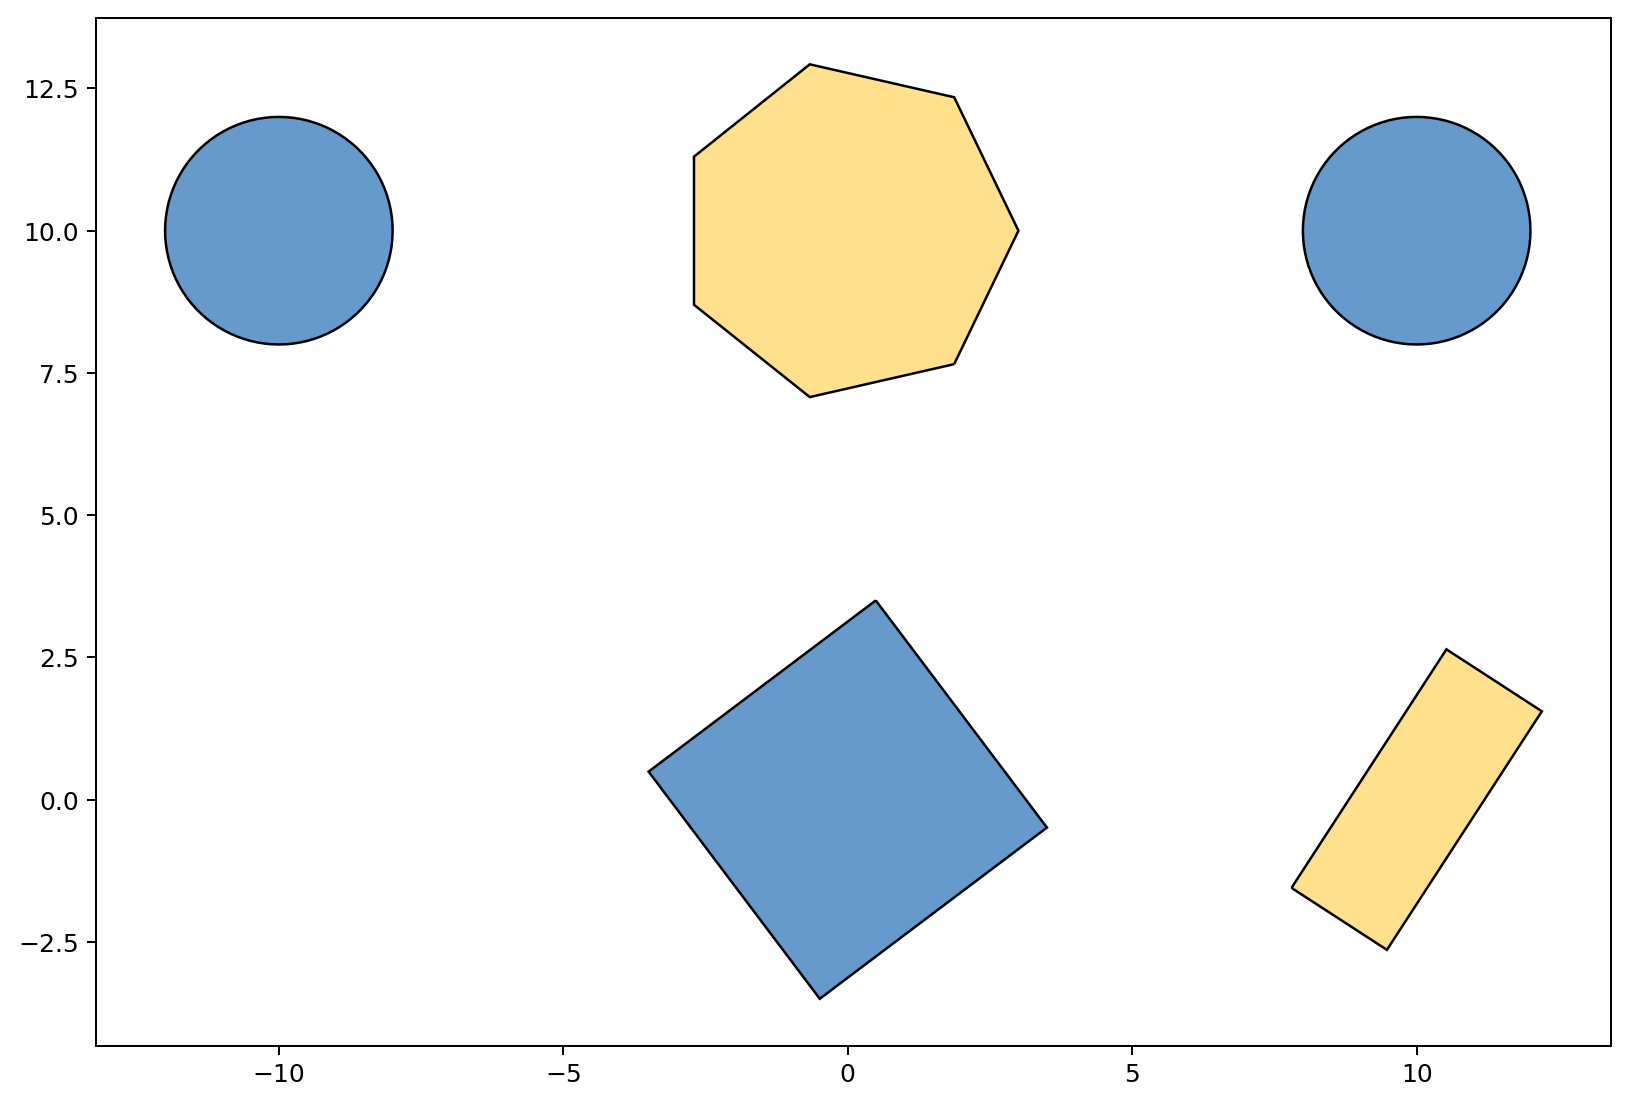

In [2]:
s = Structure()
s.add_layer("layer1", Square(5, direction=37))

a = Structure()
a.add_layer("layer2", Rectangle(5, 2))
a.rotate(57).moveby((10,0))

b = Structure()
b.add_layer("layer1", Circle(2))
b.moveby((10,10)).mirror("y", keep_original=True)

c = Structure()
c.add_layer("layer2", RegularPolygon(radius=3, num_edges=7, location=(0, 10)))

s.append(a).append(b).append(c)
s.quickplot(plot_cfg)

### Lego-style assembling

<Axes: >

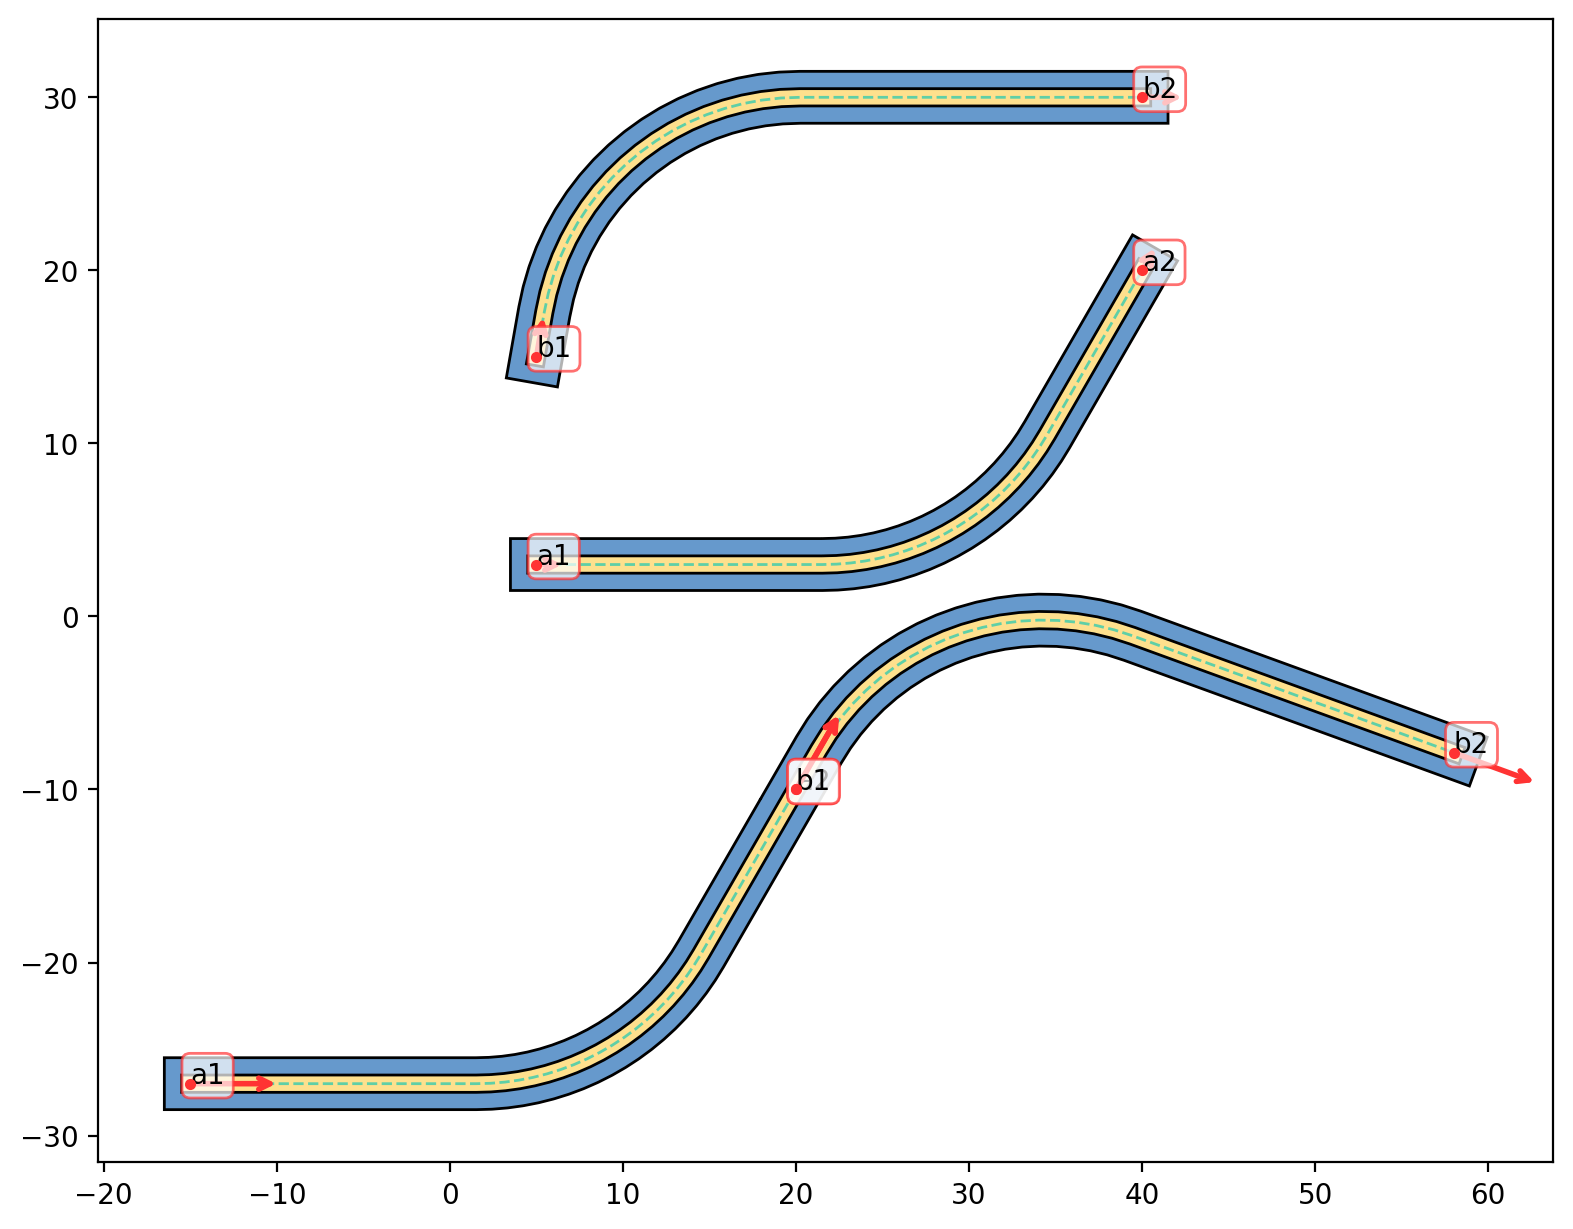

In [3]:
a1 = Anchor((5,3), 0, "a1")
a2 = Anchor((40, 20), 60, "a2")
layer_info = {"layer1": 3,
              "layer2": 1}
s1 = Fillet(anchor=(a1, a2), radius=15, layers=layer_info)

b1 = Anchor((5,15), 80, "b1")
b2 = Anchor((40, 30), 0, "b2")
s2 = Fillet(anchor=(b1, b2), radius=15, layers=layer_info)

assembled = Structure()
assembled.append(s1).moveby((-20, -30)).append(s2, anchoring=("a2", "b1"), direction_snap=True)

fig = plt.figure(figsize=SIZE_L)
ax = fig.add_subplot(111)
s1.quickplot(plot_cfg, ax=ax)
s2.quickplot(plot_cfg, ax=ax)
assembled.quickplot(plot_cfg, ax=ax)

### RES uChannels

<Axes: >

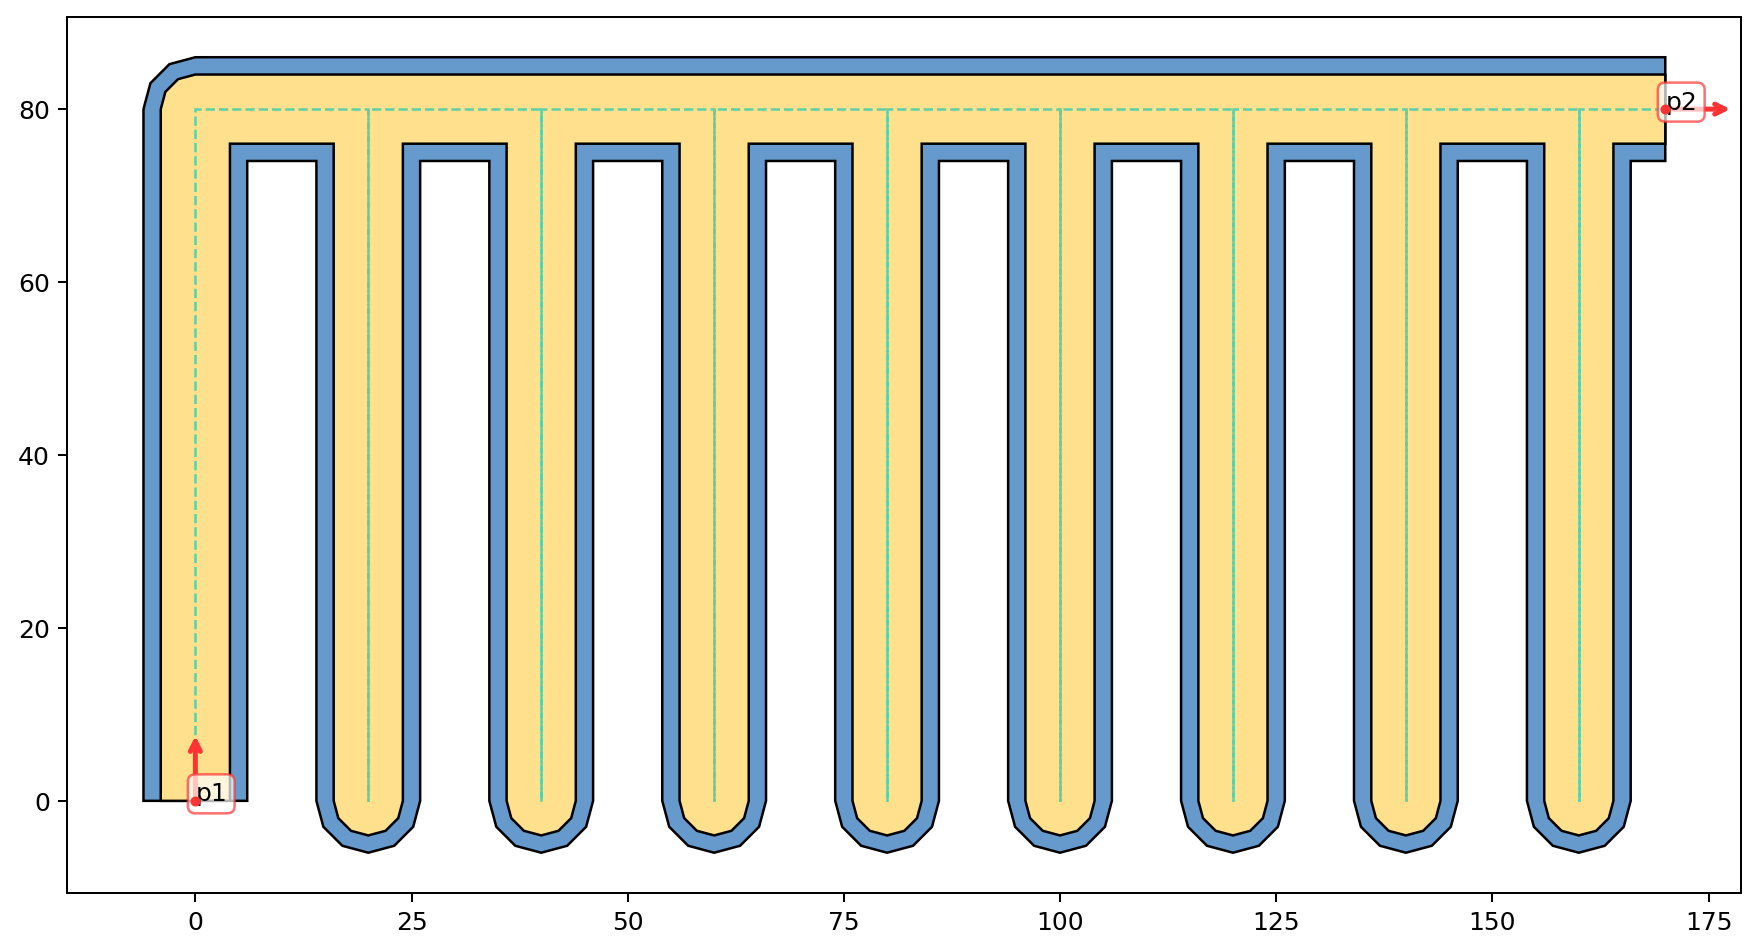

In [4]:
layer_info = {"layer1": 12,
              "layer2": 8}
reservior = MicroChannels(length=80,
                          spacing=20,
                          num=9,
                          angle=0,
                          layers=layer_info,
                          alabel=("p1", "p2"))

reservior.quickplot(plot_cfg)

### Taper

<Axes: >

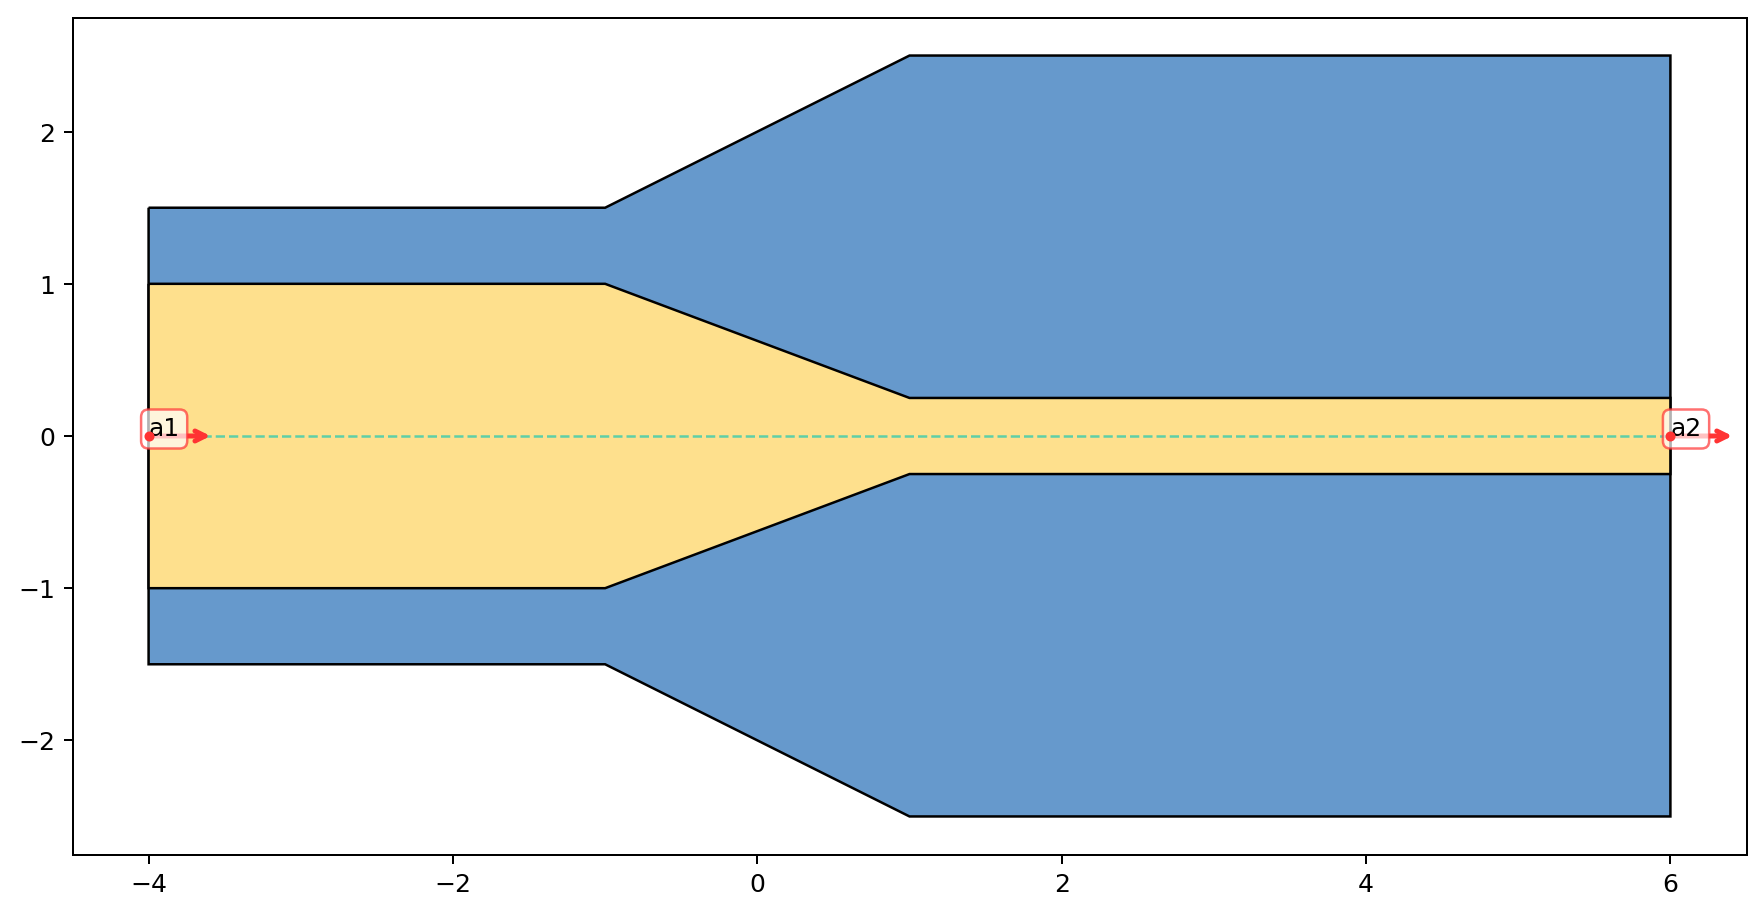

In [5]:
layer_info = {"layer2": (2, 0.5),
              "layer1": (3, 5)}
tp = Taper(length=2,
           layers=layer_info,
           alabel=("a1","a2"))

tp.quickplot(plot_cfg)

### Spiral Inductor

<Axes: >

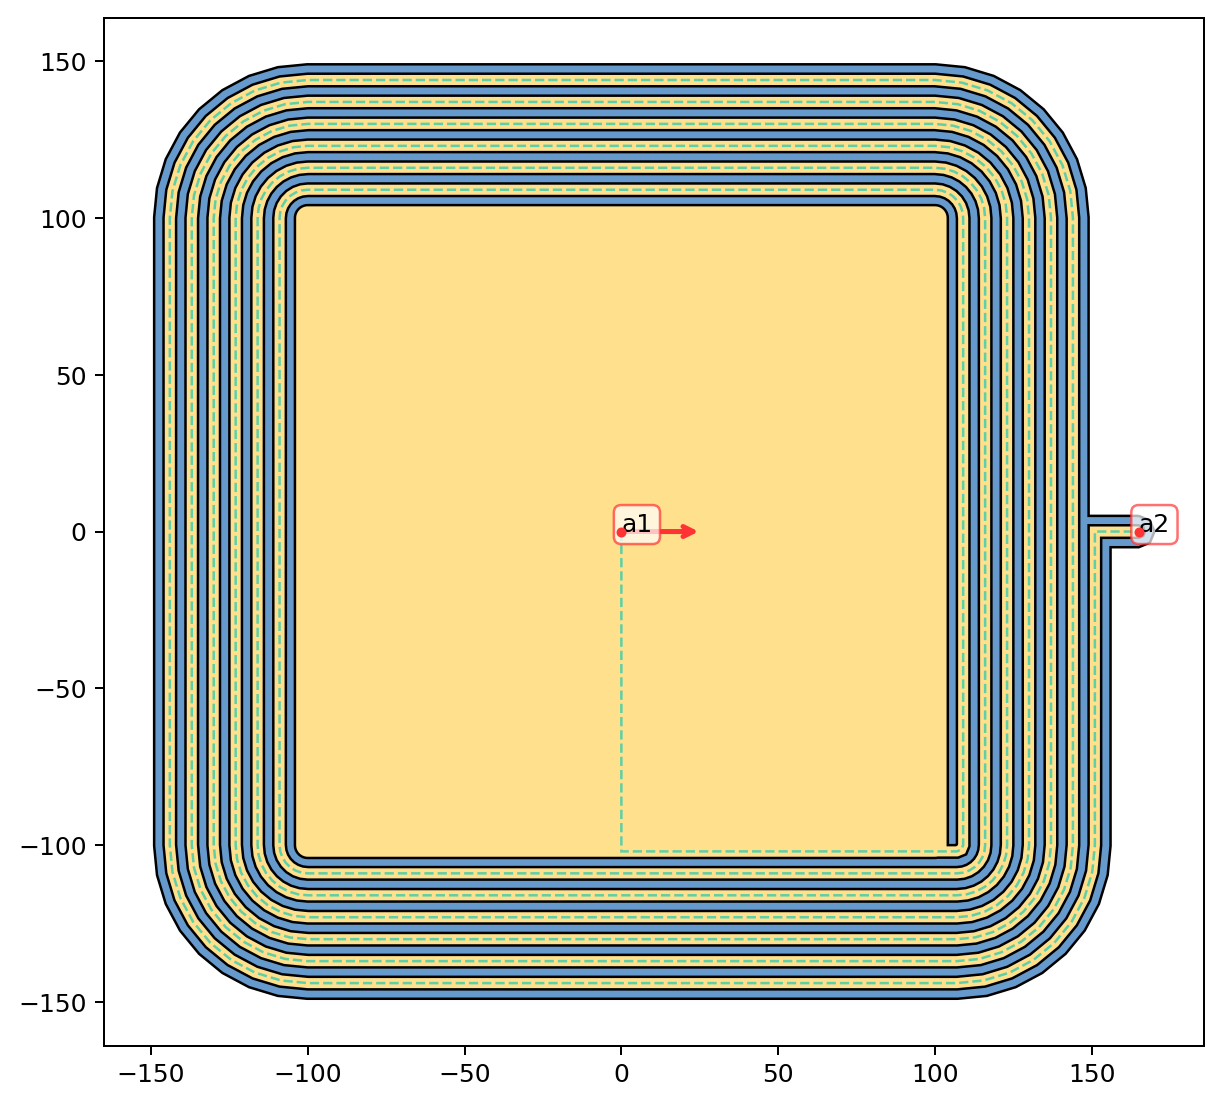

In [6]:
layer_info = {"layer2": 4,
              "layer1": 10}
spi = SpiralInductor(size = 200, 
                    width = 4, 
                    gap = 3, 
                    num_turns = 6, 
                    smallest_section_length = 0.5,
                    layers = layer_info,
                    alabel=("a1", "a2"))

spi.quickplot(plot_cfg)
#spI.save_to_file("spiral_inductor")

### IDC

<Axes: >

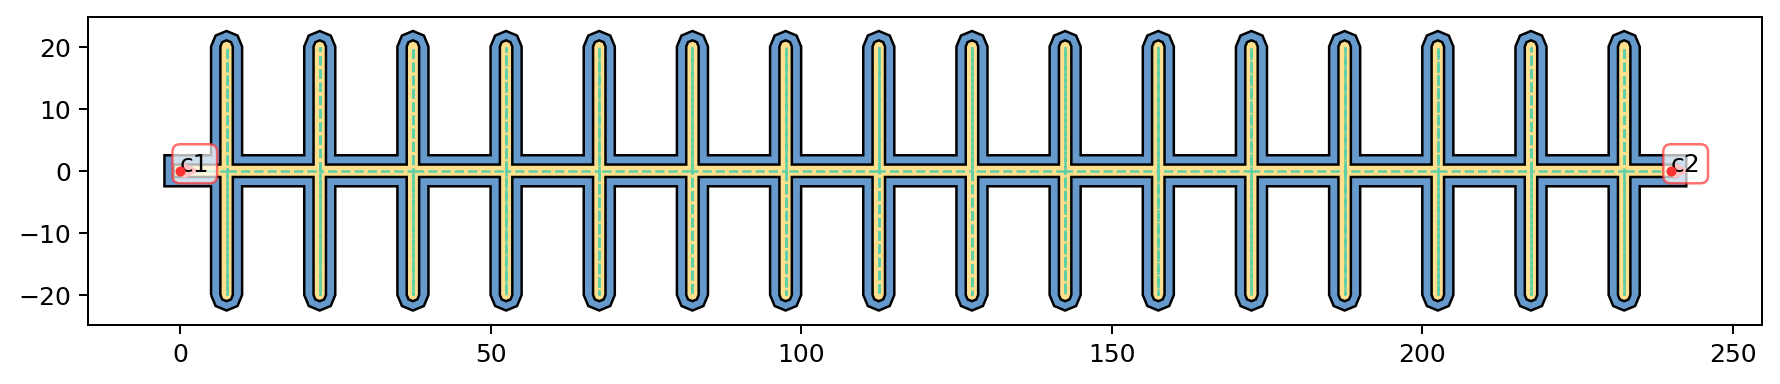

In [7]:
layer_info = {"layer2": 2,
              "layer1": 5}
idc = IDC(length=20, 
          spacing=15, 
          num=15, 
          layers=layer_info,
          alabel=("c1", "c2"))

idc.quickplot(plot_cfg)

### CPW Launcher

<Axes: >

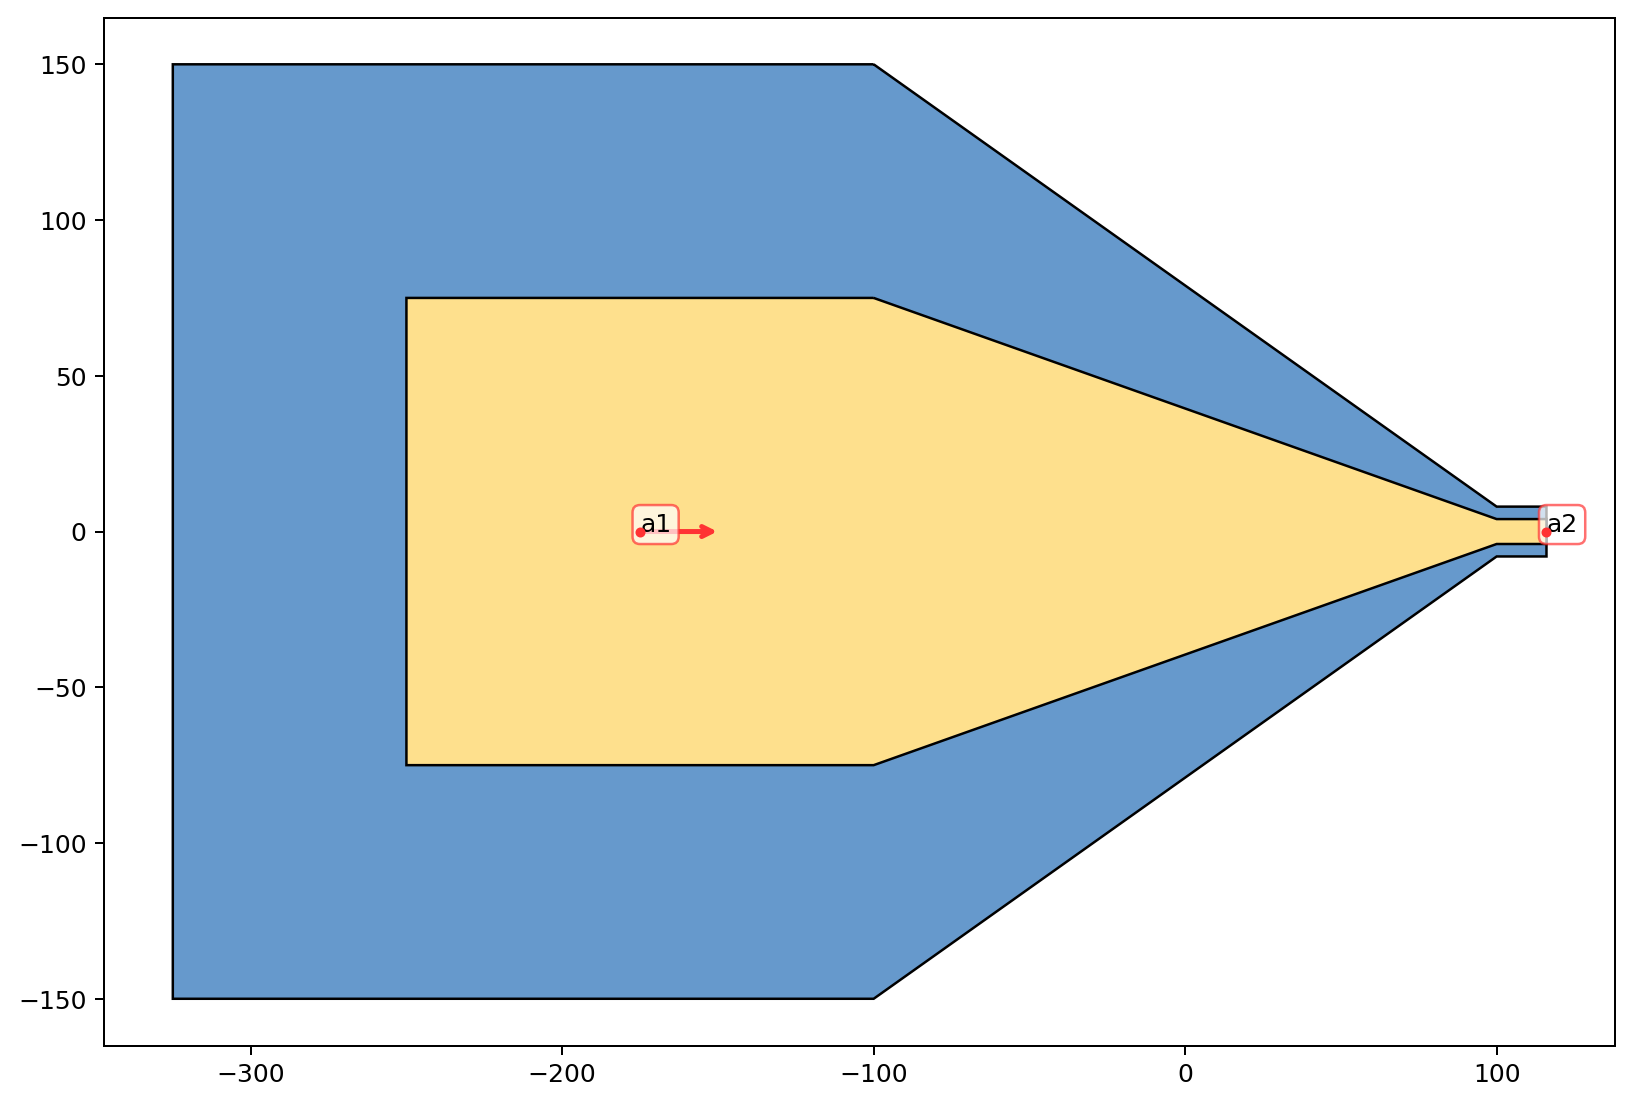

In [8]:
cpwlauncher = Taper(length = 200,
                    layers = {"layer2": (150, 8),
                              "layer1": (300, 16)},
                              alabel=("a1","a2"))
cpwlauncher.cut_polygon("layer2", Rectangle(150, 200, (-325,0)))
cpwlauncher.cut_polygon("layer1", Rectangle(75, 400, (-325-75/2,0)))
cpwlauncher.get_anchor("a1").move(225)
cpwlauncher.remove_skeletone()
cpwlauncher.quickplot(plot_cfg)